# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# normalize and scale data
from sklearn.preprocessing import StandardScaler, normalize
# will apply this sometime
from sklearn.cluster import KMeans
# this too
from sklearn.decomposition import PCA

In [76]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# You have to include the full link to the csv file containing your dataset
creditcard_df  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSforBiz_CaseStudies/Section4_MarketingDepartment/Marketing_data.csv')
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [78]:
# pandas info of data frame providing column, names & dtypes
creditcard_df.info()
# statistical summary using describe method
creditcard_df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [79]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000] 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [80]:
# Let's see who made cash advance of $47137!
# Had to determine the true max value of CASH_ADVANCE, due to truncation in output
# obtain all the features, importantly CASH_ADVANCE, wasn't provided without the above
creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()]
# This customer made 123 cash advance transactions!!
# Never paid credit card in full


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

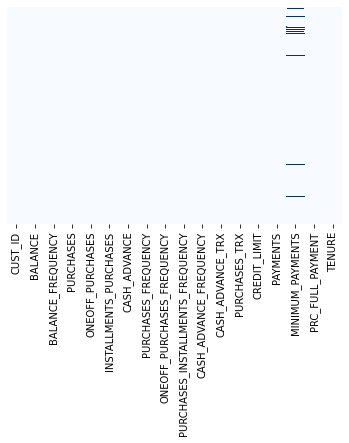

In [81]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap= 'Blues')
# note: there are some missing data in the minimum payments

In [82]:
# check for any missing values not detected by heatmap
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [83]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
# seems reasonable to fill it up with the average:
# find min payment, if null is true, go to min payments, then replace min payments with mean value
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [84]:
# check again
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [85]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [86]:
# check once more for missing values
creditcard_df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

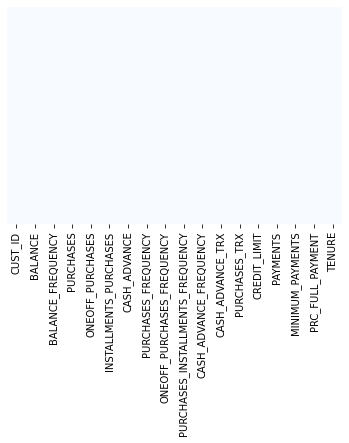

In [87]:
# double check
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap= 'Blues')

In [88]:
# Let's see if we have duplicated entries in the data
# nice method to call to check for number of duplicated items
creditcard_df.duplicated().sum()

0

In [89]:
# Let's drop Customer ID since it has no meaning here 
# drop the entire column and replace in memory 
creditcard_df.drop('CUST_ID', axis=1, inplace = True)

In [90]:
# can see CUST_ID has been dropped
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [91]:
# come up with lenght of credit card columns
# using the value to visualize all columns, using kernel density estimate (KDE) function. 
n = len(creditcard_df.columns)
n

17

In [92]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

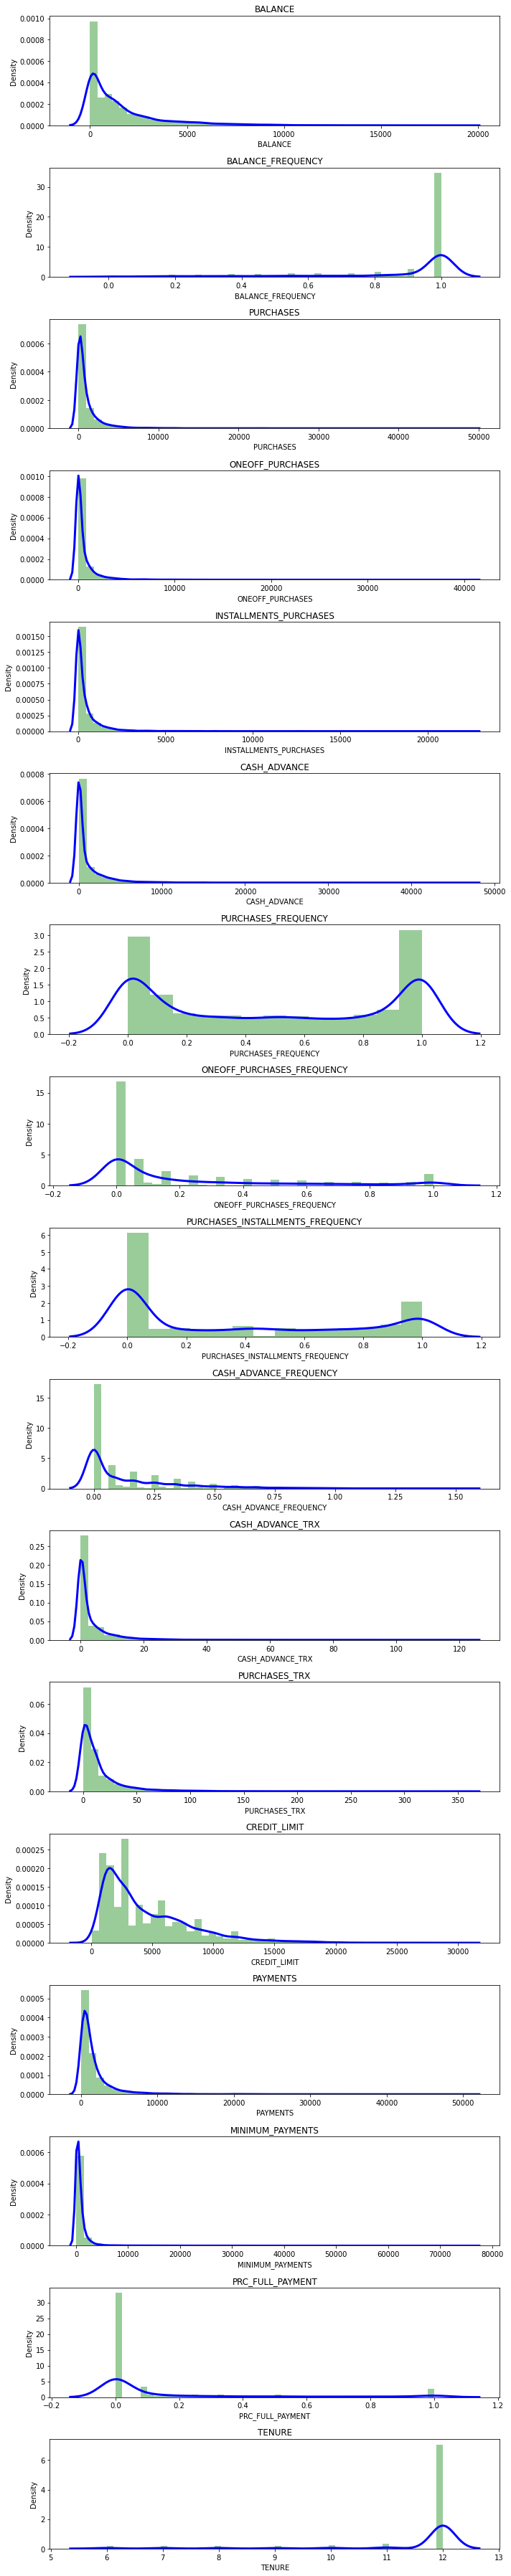

In [93]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

# plot with displot
plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1) # plotting subplots
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [94]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
correlations = creditcard_df.corr()

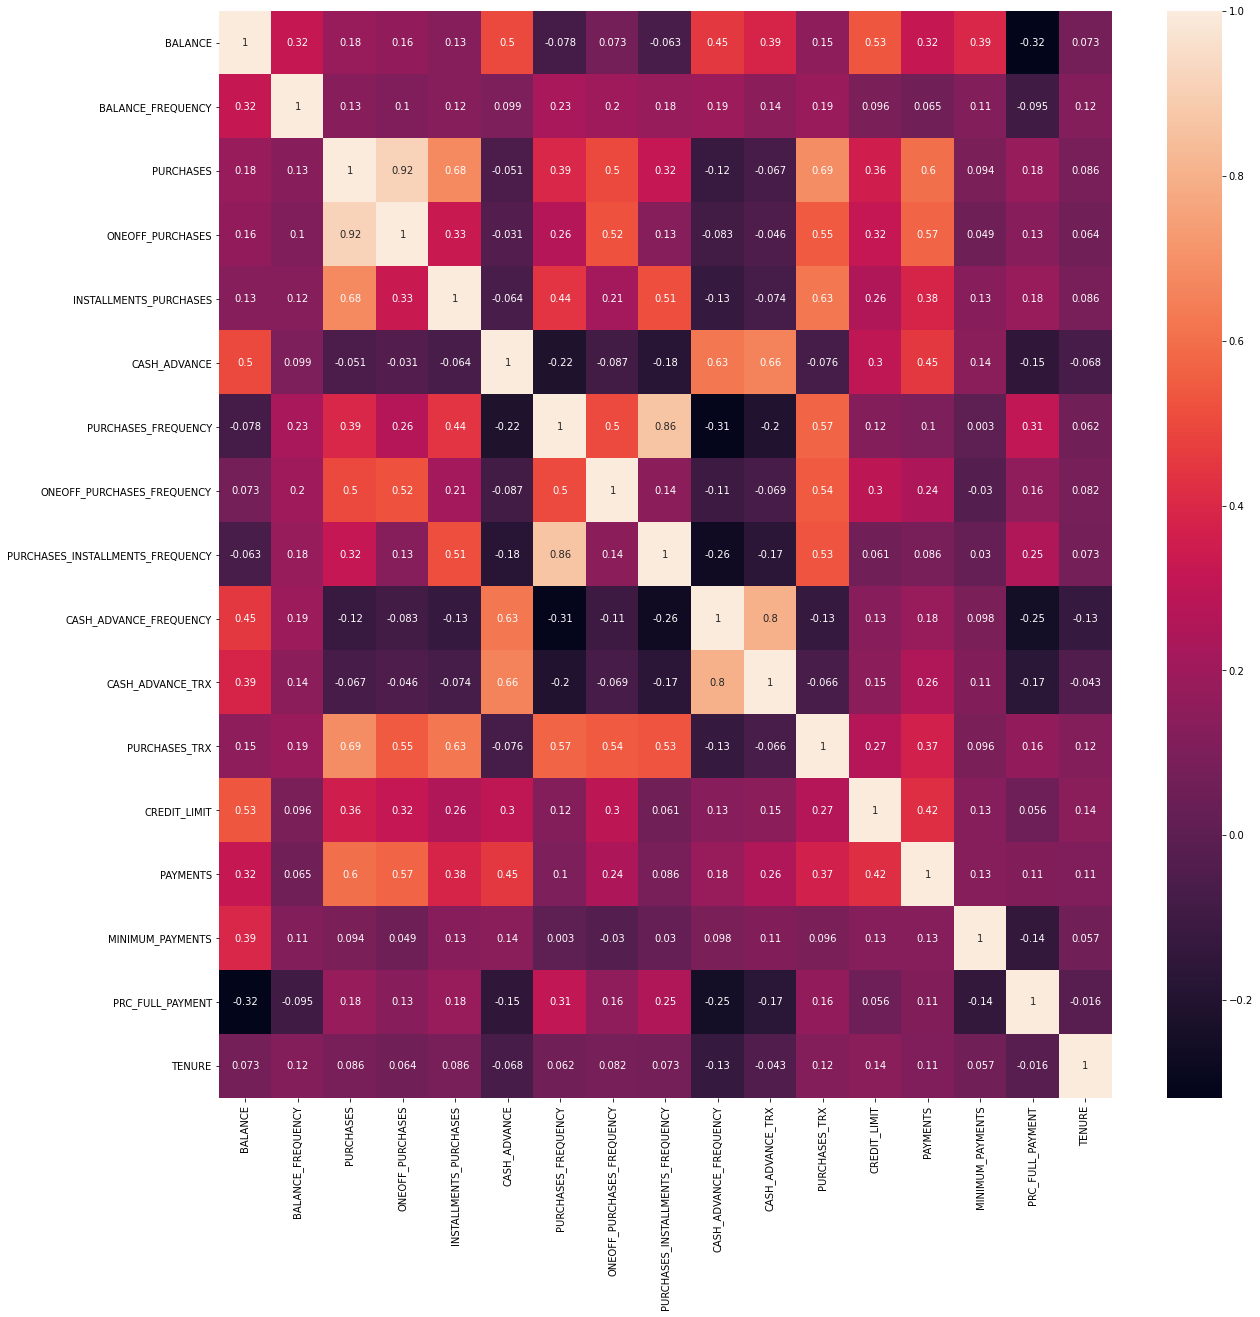

In [95]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True)

In [96]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [97]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [98]:
creditcard_df_scaled.shape

(8950, 17)

In [99]:
# looking at beautiful normalized data
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [100]:
# apply our elbow method, WCSS and number of clusters
scores_1 = [] # empty list, accumulator that accumulates all scores, WCSS

range_values = range(1,20) # try values of k

for i in range_values :
  kmeans = KMeans(n_clusters = i) # apply with various values of k for k means algorithm, 1 parameter : inertia, our WCSS
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

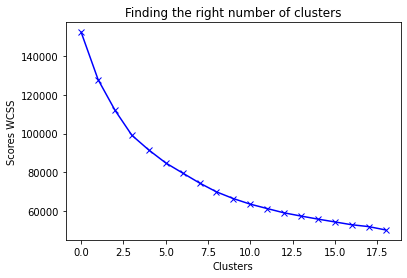

In [101]:
# plot the list of WCSS scores
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()
# 8 seems to be a reasonable K

In [102]:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

In [103]:
# call the kmeans with 8 Clusters
"""
The object of the k-means clustering is to minimize the total variance within 
the clusters and have high variance between the clusters. The total 
intra-cluster variance objective function (which is also known as the squared 
error function) is calculated using the following formula:
"""
kmeans = KMeans(8)
# fit the normalized data with kmeans method
kmeans.fit(creditcard_df_scaled)
# assign labels to labels
labels = kmeans.labels_

In [104]:
# look at array of labels
labels

array([1, 4, 3, ..., 6, 6, 6], dtype=int32)

In [105]:
# equivalent to the  8 k  values, 0 - 7
labels.max()

7

In [106]:
# look at the cluster_centers_ shape
kmeans.cluster_centers_.shape

(8, 17)

In [107]:
# create cluster_centers var from data from kmeans, associated with our features
# looks unintelligible
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [108]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.057789,0.467735,2.463886,1.810030,2.500557,-0.135651,1.167125,1.551214,1.275155,-0.272958,-0.137690,3.117666,1.288323,1.453719,0.693471,0.238562,0.337784
1,0.001019,0.403237,-0.355983,-0.240556,-0.399660,-0.108882,-0.847316,-0.390616,-0.751831,0.082906,-0.042738,-0.480158,-0.313398,-0.255173,-0.013319,-0.456123,0.274249
2,-0.366146,0.331879,-0.033103,-0.241952,0.366045,-0.362501,0.996056,-0.382317,1.208379,-0.473160,-0.360008,0.190433,-0.260375,-0.213798,-0.043561,0.319058,0.255843
3,-0.132766,0.400317,0.543702,0.673535,0.047989,-0.330716,0.982918,1.907689,0.174518,-0.412960,-0.331372,0.620911,0.436778,0.148574,-0.158184,0.450124,0.268279
4,1.652594,0.396557,-0.227842,-0.164073,-0.237368,1.967982,-0.492150,-0.219541,-0.428536,1.898596,1.888421,-0.277680,1.006368,0.774731,0.508387,-0.396781,0.074168
5,-0.701105,-2.144689,-0.310288,-0.234728,-0.302319,-0.319756,-0.555350,-0.442572,-0.440279,-0.520622,-0.376063,-0.419425,-0.174834,-0.191672,-0.256414,0.287166,0.199969
6,-0.337268,-0.347383,-0.287908,-0.214195,-0.286875,0.065880,-0.201713,-0.285924,-0.224146,0.307641,0.000231,-0.387540,-0.566247,-0.392967,-0.209581,0.014243,-3.201610
7,1.838131,0.292625,12.491209,12.550011,6.476826,-0.023453,0.991268,2.051914,0.835604,-0.484482,-0.225738,4.371742,3.253863,8.717656,1.034419,1.162906,0.298409


In [109]:
# In order to understand what these numbers mean, perform inverse  transformation and reassign cluster_centers
# Undo the scaling of X according to feature_range.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers
# looks readable now since it's reverted back

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3766.172402,0.988073,6267.335710,3596.716518,2672.290501,694.403852,0.958774,0.665215,0.871216,0.080522,2.309192,92.203343,9181.894150,5941.518546,2480.310865,0.223490,11.969359
1,1566.596467,0.972794,242.642372,193.163701,49.659813,750.539599,0.150282,0.085929,0.065641,0.151735,2.957174,2.774890,3354.178868,994.443728,833.166094,0.020306,11.884334
2,802.372339,0.955890,932.479403,190.845851,742.077970,218.689478,0.890116,0.088405,0.844678,0.040460,0.792040,19.443284,3547.099603,1114.219065,762.690465,0.247034,11.859701
3,1288.133627,0.972102,2164.831918,1710.368082,454.463835,285.343167,0.884843,0.771558,0.433795,0.052507,0.987455,30.143369,6083.626588,2163.250196,495.566237,0.285368,11.876344
4,5004.209702,0.971211,516.417238,320.110453,196.419127,5105.821768,0.292827,0.136964,0.194126,0.515073,16.135912,7.807735,8156.027122,3975.914921,2048.980867,0.037663,11.616575
5,105.184382,0.369214,340.270161,202.836859,137.684615,308.328143,0.267462,0.070430,0.189459,0.030962,0.682472,4.284505,3858.331452,1178.272500,266.644384,0.237706,11.784928
6,862.479700,0.794979,388.085586,236.917416,151.649711,1117.023571,0.409393,0.117161,0.275356,0.196706,3.250401,5.077047,2434.212599,595.544169,375.787595,0.157880,7.232745
7,5390.389571,0.946591,27690.865833,21422.884583,6267.981250,929.689201,0.888194,0.814583,0.696528,0.038194,1.708333,123.375000,16333.333333,26969.902881,3274.877294,0.493845,11.916667


In [110]:
# look at array shape of labels
labels.shape

(8950,)

In [111]:
# equivalent to the  8 k  values, 0 - 7
labels.max()

7

In [112]:
# min label
labels.min()

0

In [113]:
#taking a look at the original dataframe
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [114]:
# we want to concatenate the cluster labels to the original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()
# note that the column has been added and each customer has an association with a cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


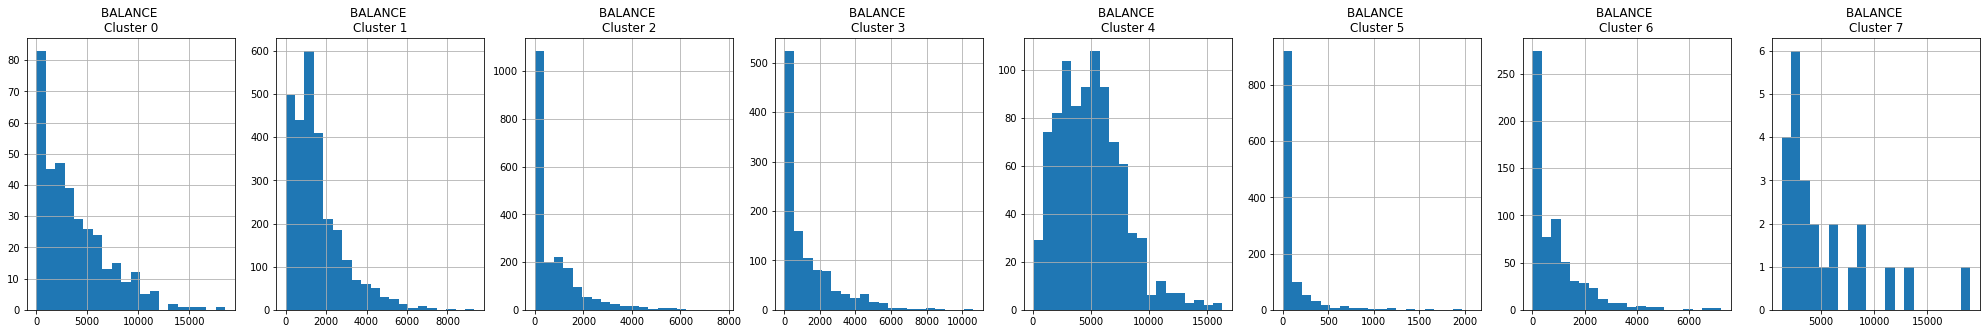

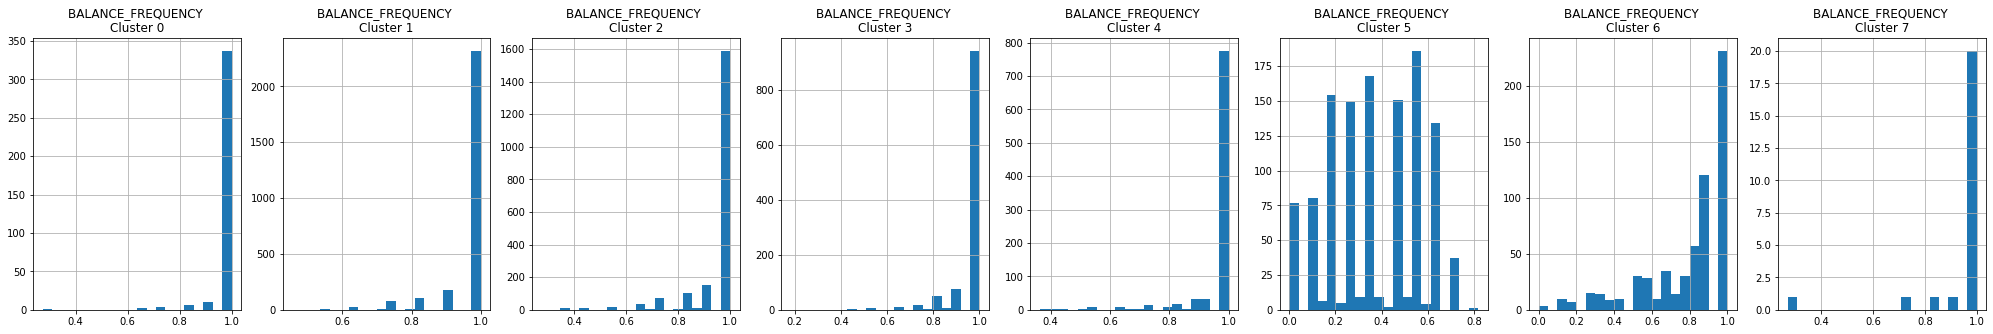

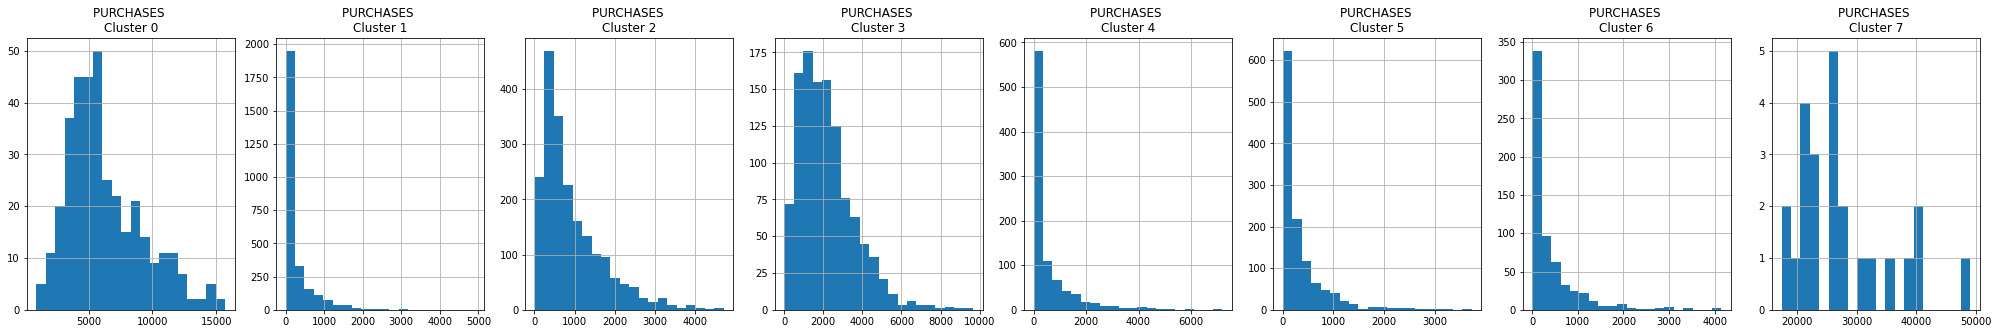

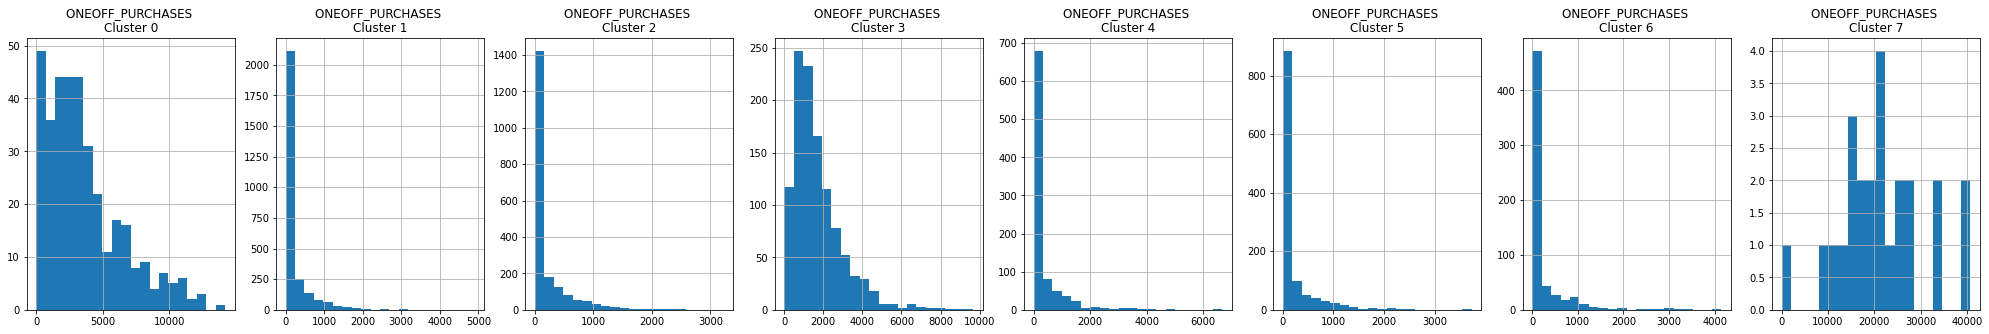

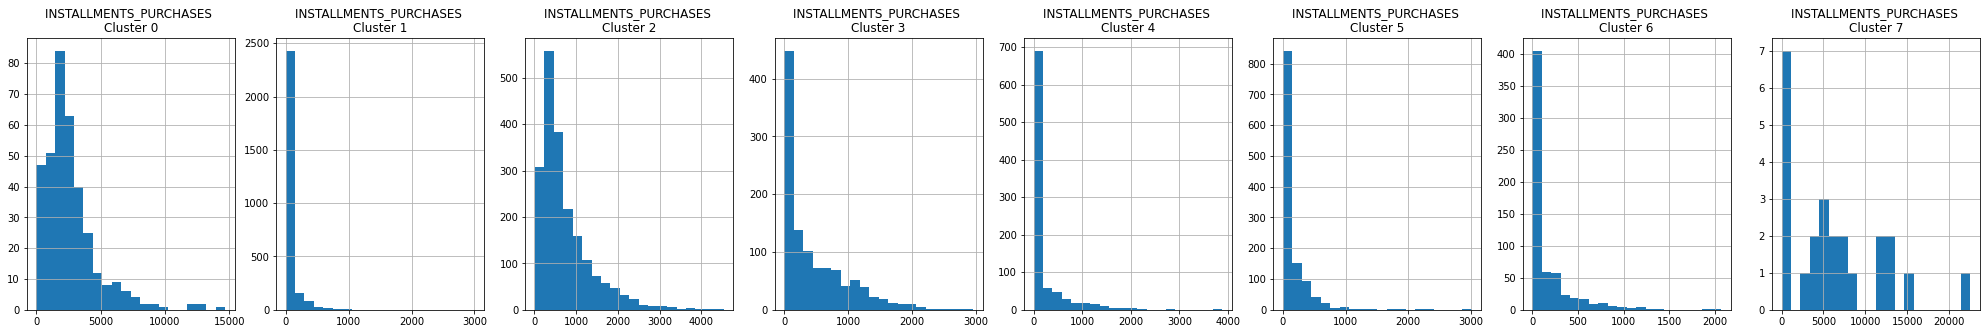

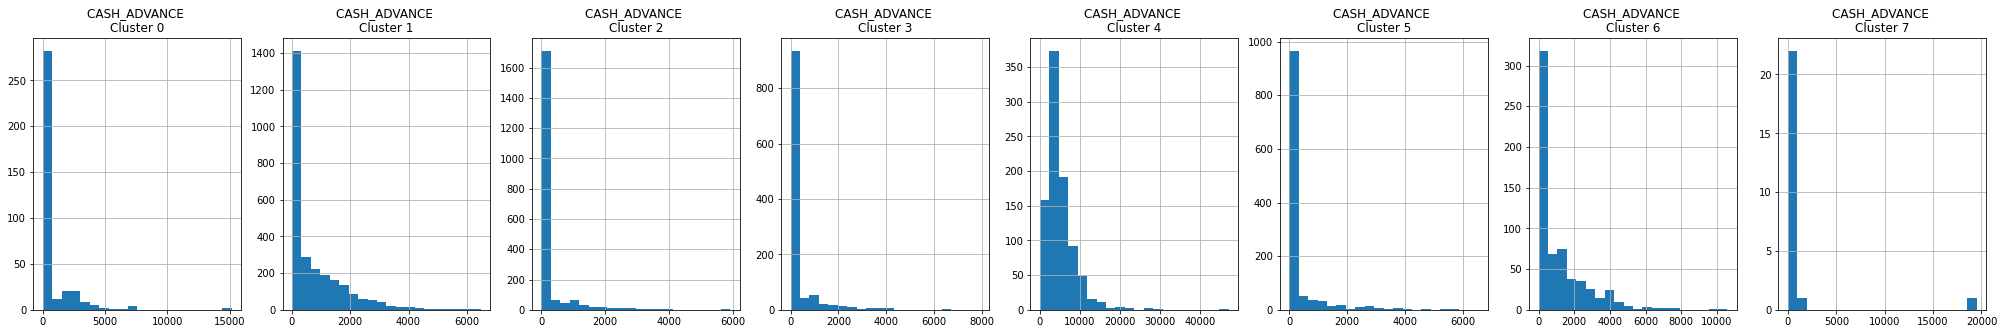

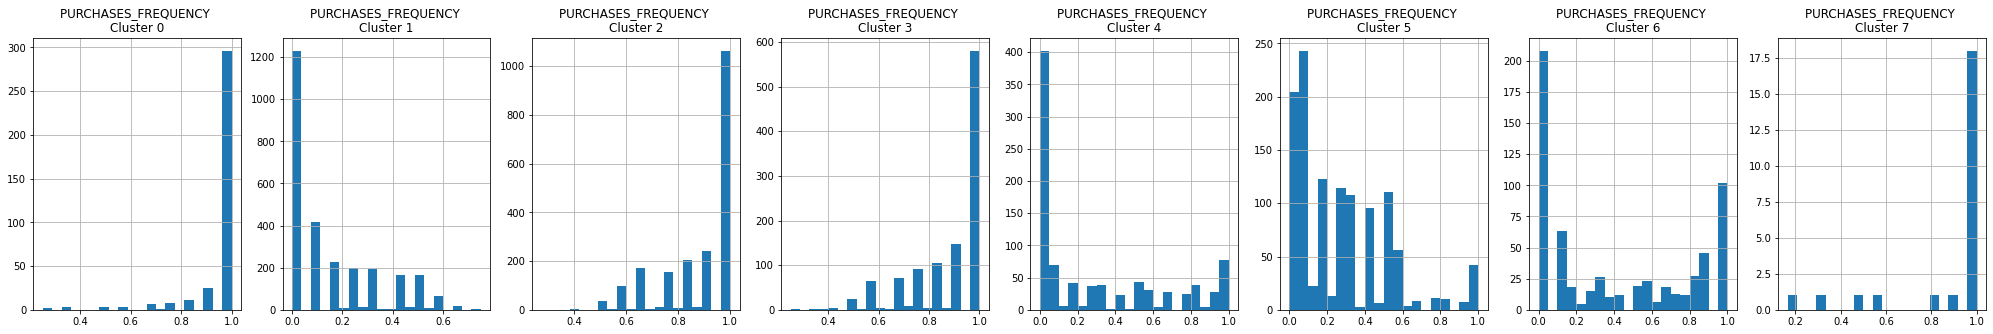

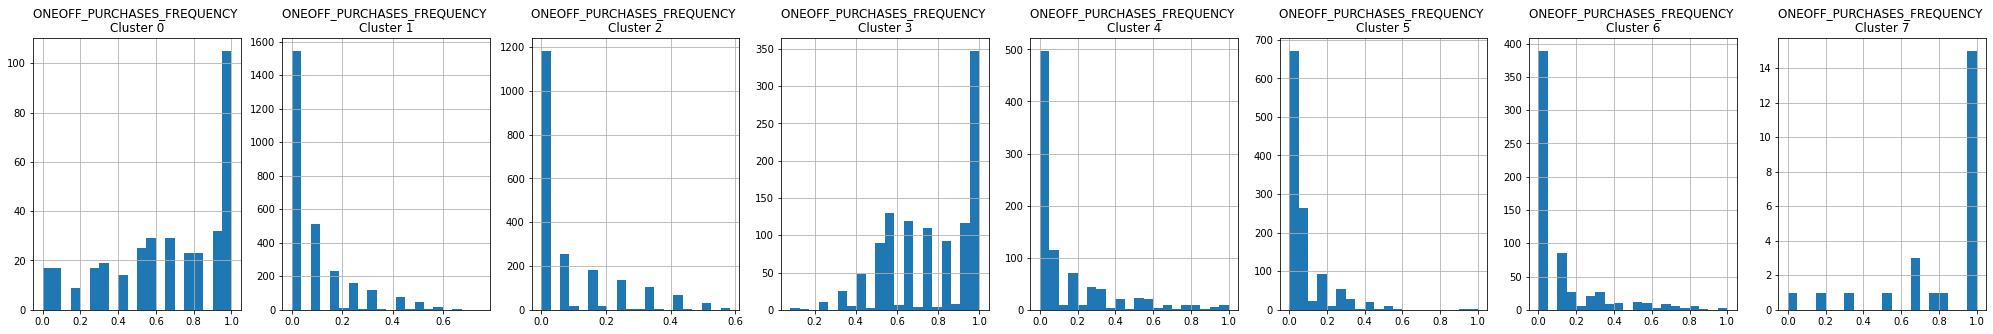

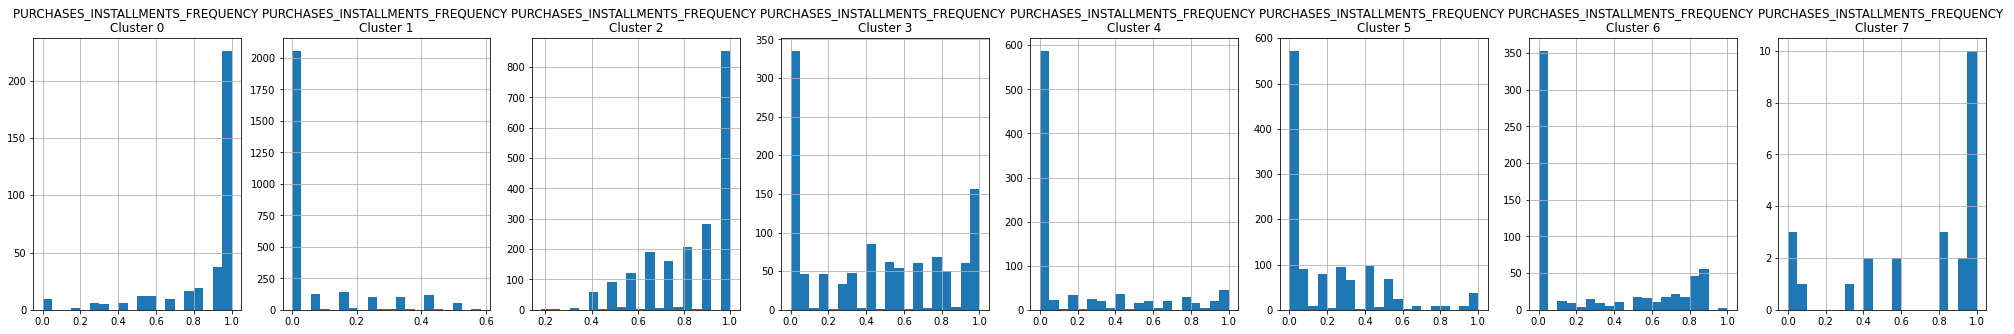

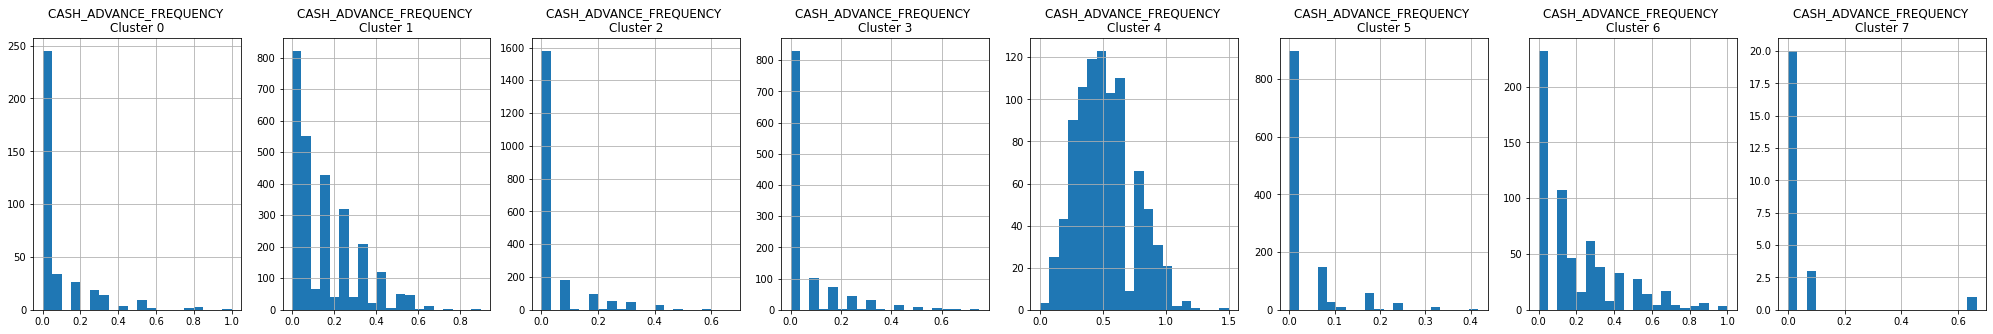

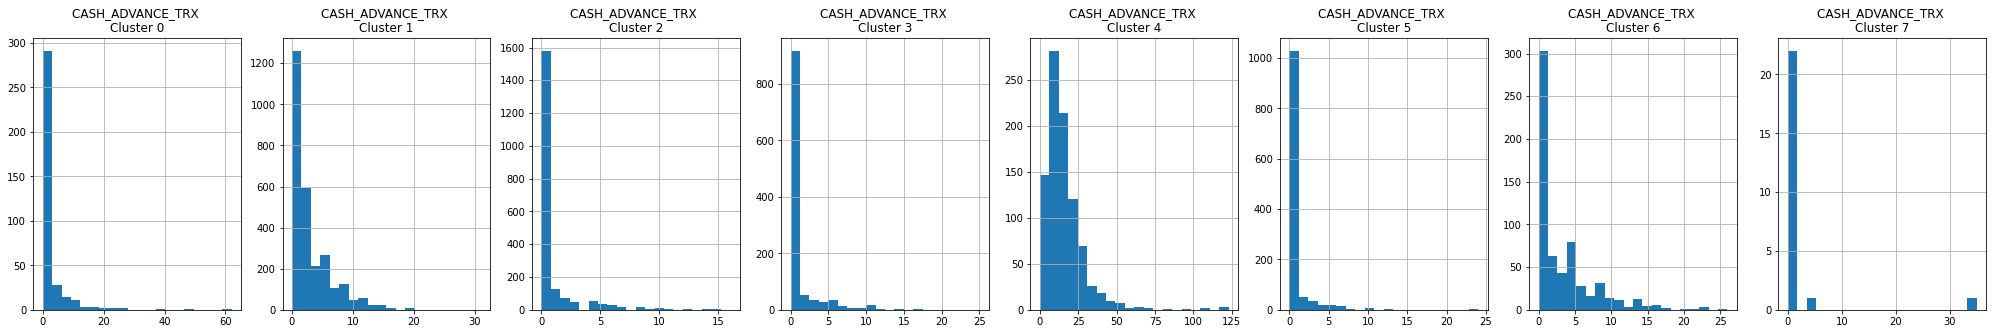

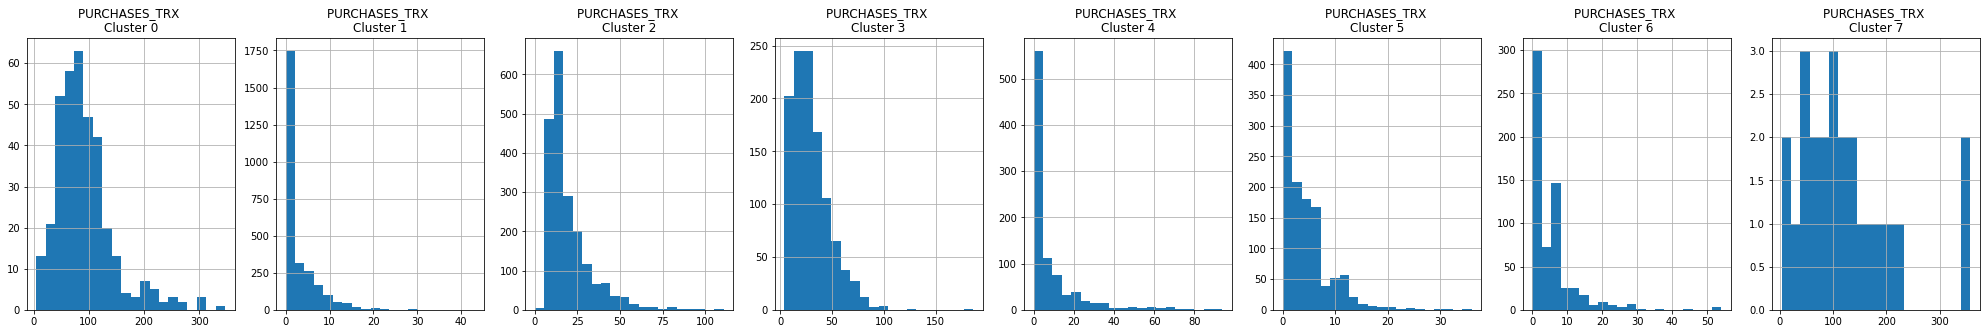

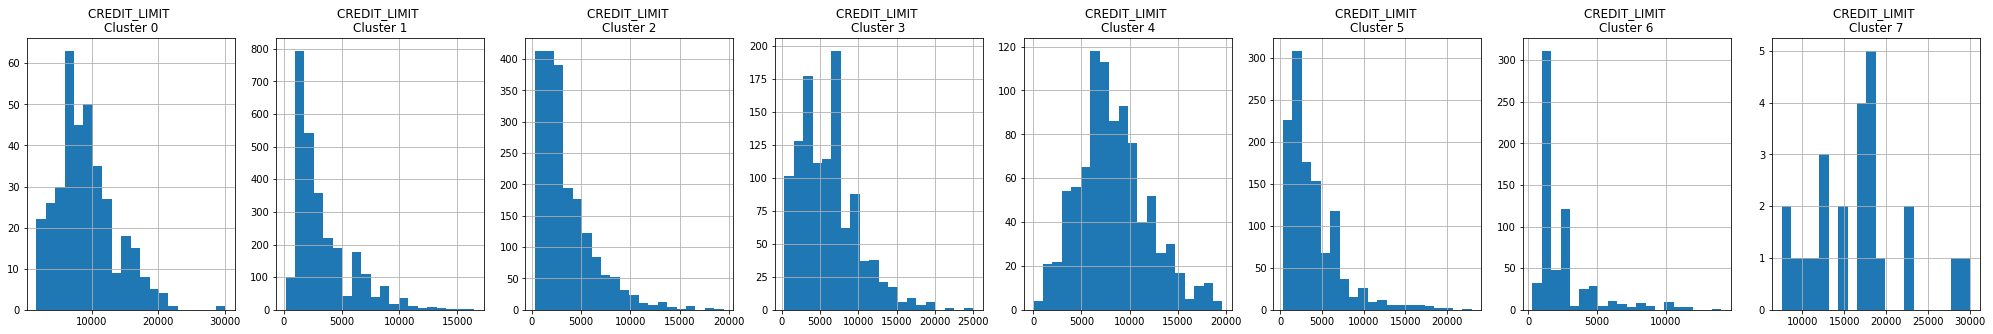

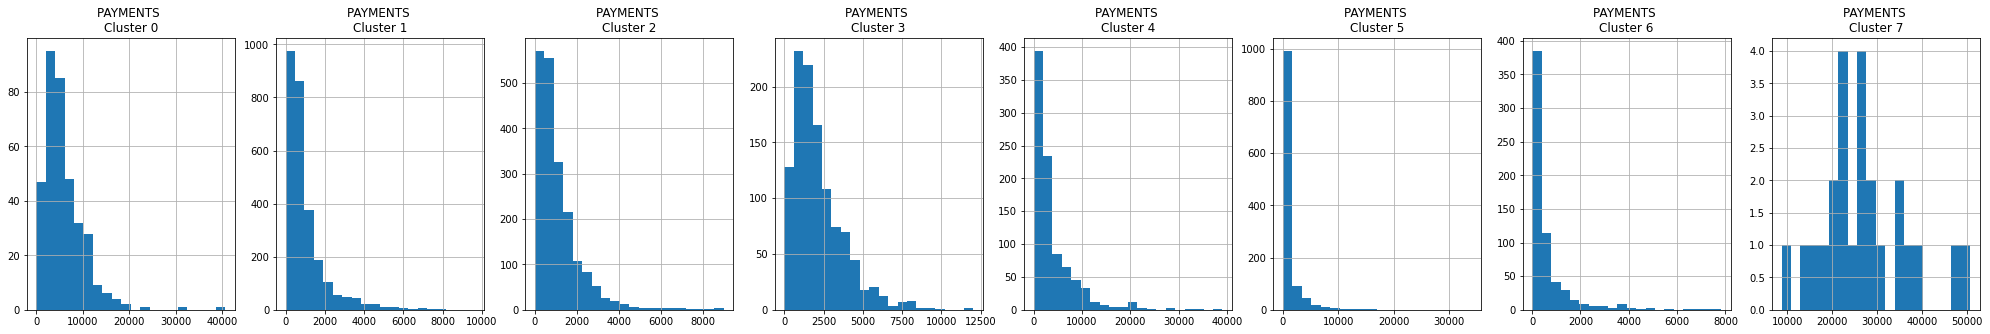

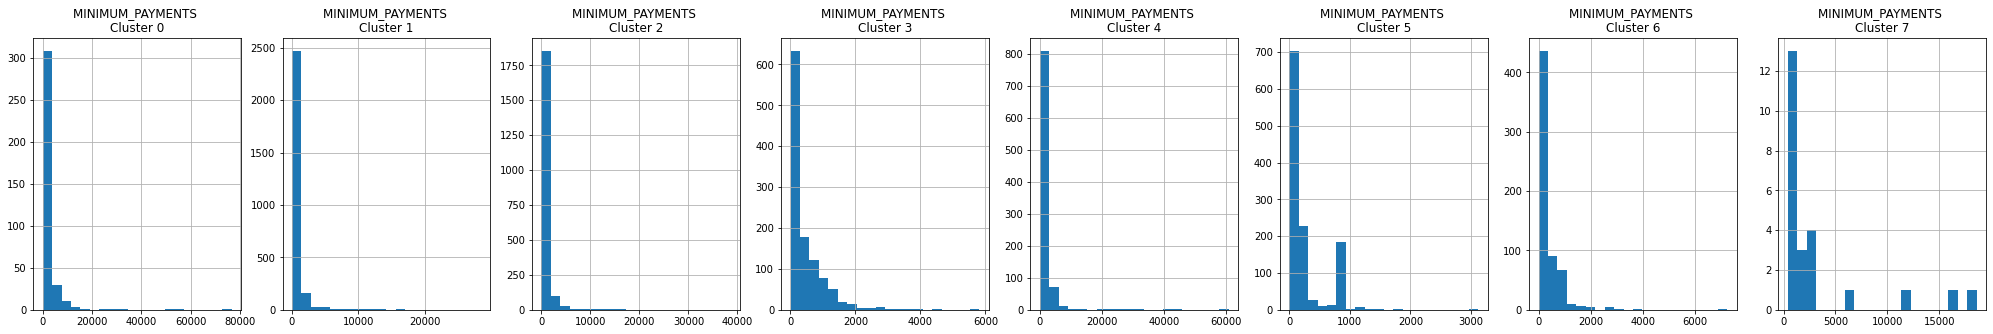

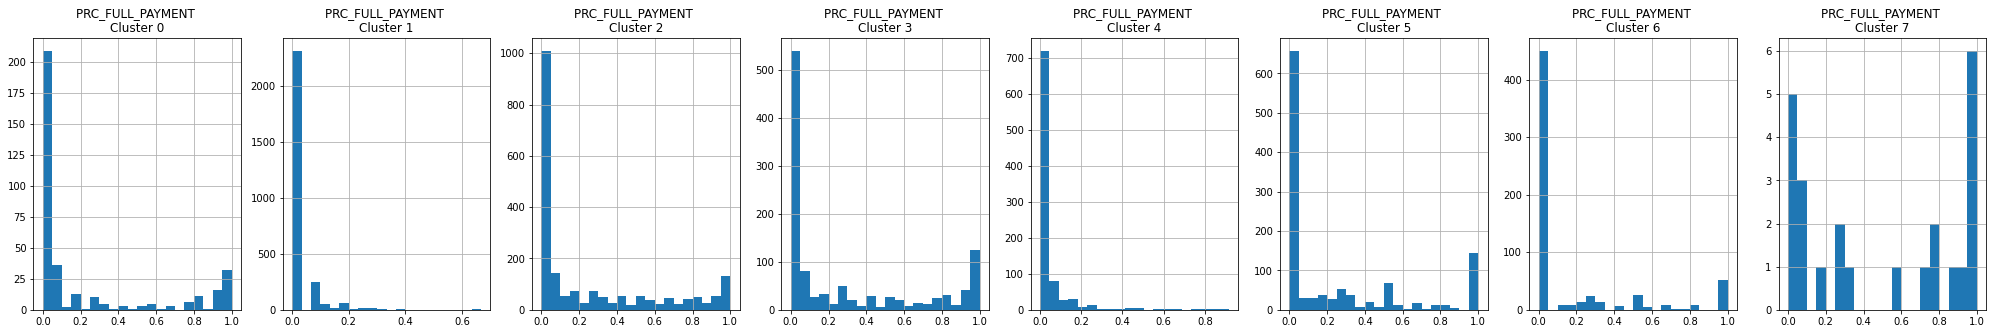

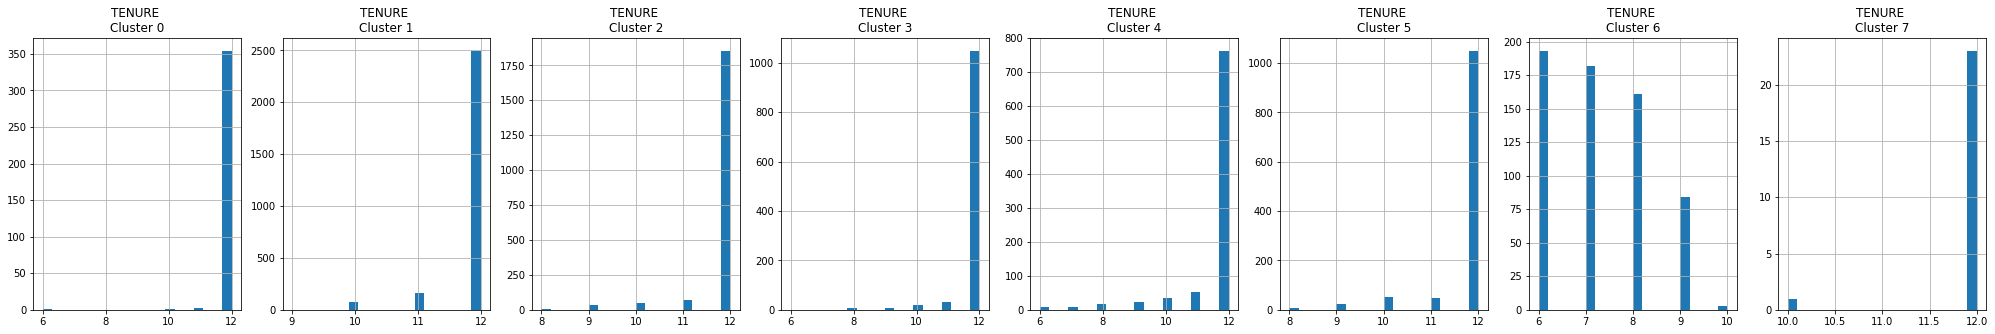

In [115]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize=(35, 5))
  for j in range(8) :
    plt.subplot(1, 8, j+1) # sub plot assignment
    # condition to cluster column to parse through each row and assign it to the correct subplot
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \nCluster {}'.format(i, j))

plt.show()
# First Customers cluster (Transactors): Those are customers who pay least amount 
# of interest charges and careful with their money, Cluster with lowest balance 
# ($104) and cash advance ($303), Percentage of full payment = 23%.
# Second customers cluster (revolvers) who use credit card as a loan (most 
# lucrative sector): highest balance ($5000) and cash advance (~$5000), low 
# purchase frequency, high cash advance frequency (0.5), high cash advance 
# transactions (16) and low percentage of full payment (3%).
# Third customer cluster (VIP/Prime): high credit limit $16K and highest 
# percentage of full payment, target for increase credit limit and increase 
# spending habits.
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [116]:
# Obtain the principal components 
# using pca from sklearn.decomposition
pca = PCA(n_components=2) # specifying only 2, and compress into two components
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222099, -1.07645274],
       [-1.13829648,  2.5064696 ],
       [ 0.96968189, -0.38352603],
       ...,
       [-0.92620331, -1.81078355],
       [-2.33655058, -0.65796164],
       [-0.55642135, -0.40046452]])

In [117]:
# Create a dataframe with the two components
# convert into a data frame
pca_df = pd.DataFrame(data = principal_comp, columns= ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138296,2.506470
2,0.969682,-0.383526
3,-0.873631,0.043156
4,-1.599433,-0.688579


In [118]:
# Concatenate the clusters labels to the dataframe
# grab clusters, add clusters and concatenate them to pca_df
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076453,1
1,-1.138296,2.506470,4
2,0.969682,-0.383526,3
3,-0.873631,0.043156,1
4,-1.599433,-0.688579,1


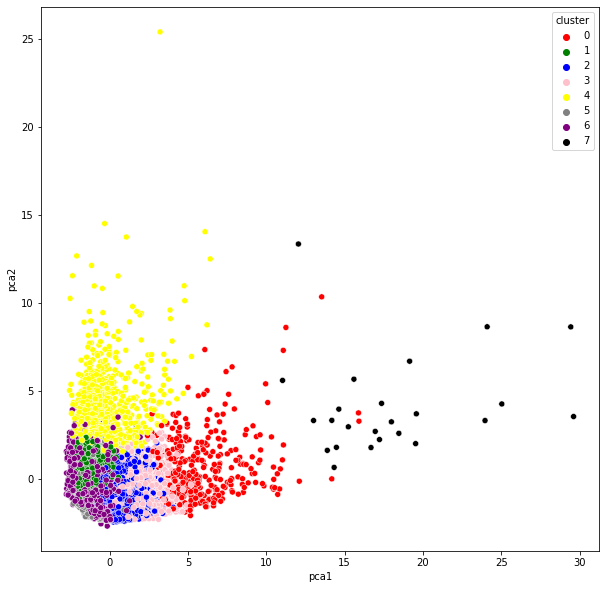

In [119]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'grey', 'purple', 'black'])
# note: took all features, pca to convert to two components. 
# k-means grouped all points into groups/clusters
# pca, dimesionality reduction, perform visualizaiton by combining kmeans with pca.

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [120]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [121]:
# build network
# specify input
input_df = Input(shape = (17, ))

# build encoder network
# Dense: fully connected ANN
x = Dense(7, activation = 'relu')(input_df) # first encoding layer
# second encoding layer
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
# third encoding layer
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
# fourth encoding layer
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

# create encoded layer / coded input
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# build decoder network
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

# build decoder layer
decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# build entire autoencoder Model
autoencoder = Model(input_df, decoded)

# Build Encoder Network, the first half
encoder = Model(input_df, encoded) # compressed input 

# Compile model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [122]:
#training data
creditcard_df_scaled.shape

(8950, 17)

In [123]:
# train autoencoder, by applying the fit method
# input & out is same
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1) 

Epoch 1/25
70/70 [==============================] - 5s 57ms/step - loss: 0.6482
Epoch 2/25
70/70 [==============================] - 4s 56ms/step - loss: 0.3237
Epoch 3/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2264
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1829
Epoch 5/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1777
Epoch 6/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1448
Epoch 7/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1250
Epoch 8/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1212
Epoch 9/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1075
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1037
Epoch 11/25
70/70 [==============================] - 4s 57ms/step - loss: 0.0862
Epoch 12/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0870
Epoch 13/25
70/70 [==================

In [124]:
# looking at the architecture of our encoder
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

In [125]:
# make predictions and looking at the code layer
pred = encoder.predict(creditcard_df_scaled)

In [126]:
# look at pred
pred

array([[0.        , 0.        , 0.        , ..., 0.7269103 , 0.30787873,
        0.        ],
       [0.        , 0.05054161, 0.        , ..., 1.6664642 , 1.8610322 ,
        0.        ],
       [0.        , 0.76369506, 0.        , ..., 1.4594324 , 0.4997736 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.1378991 ,
        3.1100044 ],
       [0.        , 0.        , 0.        , ..., 2.5081434 , 0.        ,
        3.3616314 ],
       [0.        , 0.17990589, 0.        , ..., 2.3119755 , 0.        ,
        3.8465493 ]], dtype=float32)

In [127]:
# from 17 features to 10 features, the reduction
pred.shape 

(8950, 10)

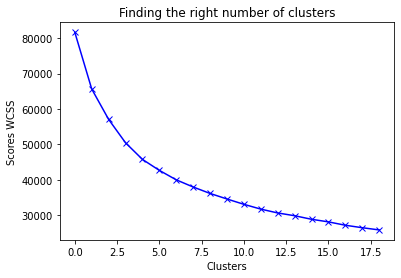

In [128]:
# can apply k-means algorithm from here
# Quiz: Identify how many k mean clusters needed.
# referring Task 5:
# apply our elbow method, WCSS and number of clusters
# NOTE: our data is scaled already
scores_2 = [] # empty list, accumulator that accumulates all scores, WCSS

range_values = range(1,20) # try values of k

for i in range_values :
  kmeans = KMeans(n_clusters = i) # apply with various values of k for k means algorithm, 1 parameter : inertia, our WCSS
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

# plot the list of WCSS scores for the predictions
plt.plot(scores_2, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()
# Reasonable K: 5

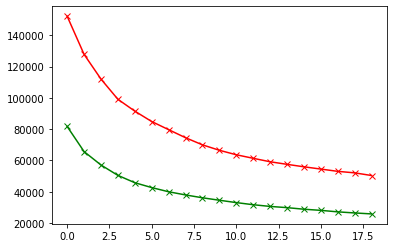

In [129]:
# Comparing the two plots, scores 1 and scores 2
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [130]:
# apply k-means using optimal number (5) of clusters
# call the kmeans with 5 Clusters
kmeans2 = KMeans(5)
# fit the normalized data with kmeans method
kmeans2.fit(pred)
# assign labels to labels2
labels2 = kmeans2.labels_

In [131]:
# important to concatenate 'labels2'...
# we want to concatenate the cluster 'labels2' to the original dataframe
creditcard_df_cluster2 = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels2})], axis = 1)
creditcard_df_cluster2.head()
# note that the column has been added and each customer has an association with a cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [134]:
# look at array of labels2
print(labels2)

# equivalent to the  8 k  values, 0 - 7
print(labels2.max())

# look at the cluster_centers_ shape of kmeans2
print(kmeans2.cluster_centers_.shape)

[1 3 1 ... 4 4 4]
4
(5, 10)


In [136]:
""" 
# much smaller than previous, which was 8,17
# create cluster_centers var from data from kmeans2, associated with our features in pred
cluster_centers2 = pd.DataFrame(data = kmeans2.cluster_centers_, columns = [pred.columns])
"""

' \n# much smaller than previous, which was 8,17\n# create cluster_centers var from data from kmeans2, associated with our features in pred\ncluster_centers2 = pd.DataFrame(data = kmeans2.cluster_centers_, columns = [pred.columns])\n'

In [137]:
# apply PCA
# Obtain the principal components 
# using pca from sklearn.decomposition
pca2 = PCA(n_components=2) # specifying only 2, and compress into two components
principal_comp = pca2.fit_transform(pred)
print(principal_comp)
pca2_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

[[-1.4410734  -0.04047523]
 [ 0.67451024  2.4552326 ]
 [-0.68064004 -0.41840324]
 ...
 [-0.70004123 -0.75756335]
 [ 0.941552    0.70894533]
 [ 0.97602725  0.08328621]]


In [139]:
# concatenate labels to data frame
pca2_df = pd.concat([pca2_df, pd.DataFrame({'cluster':labels2})], axis = 1)
pca2_df.head()

,pca1,pca2,cluster
0,-1.441073,-0.040475,1
1,0.674510,2.455233,3
2,-0.680640,-0.418403,1
3,-0.634888,0.508915,1
4,-1.442949,0.138378,1


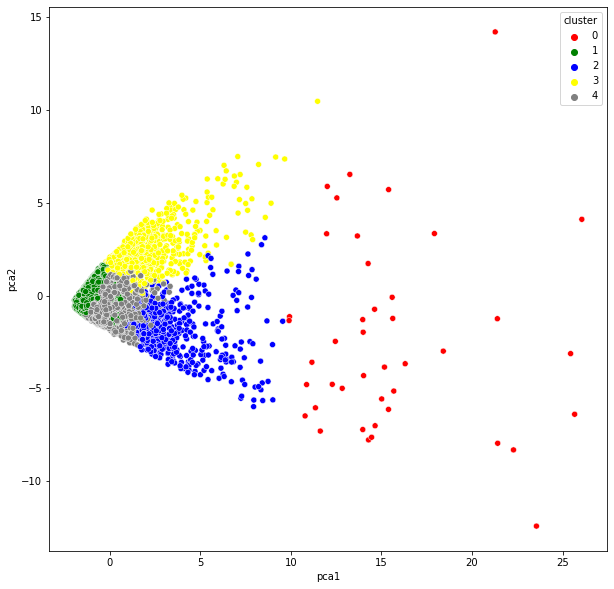

In [141]:
# visualize results
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca2_df, palette=['red','green','blue','yellow','grey'])
# start with 17 features
# use autoencoder to go down from 17 features to 10,
# apply PCA to drop them down to two components
# 5 groups / 5 clusters
# dimensionality reduction and perform market segmentation

In [ ]:
# how does it compare, the 10 features versus the 17 original features?
# shape is similar, I think it's nice to see the heat map. 
# How do you associate certain clusters to certain columns?

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS